# Beat detection
In this tutorial we will learn how to detect beats in PPG and BP signals.

The **objectives** are:
- To learn how to call Python functions which are stored in a separate file
- To use several beat detection algorithms to detect beats in PPG and BP signals
- To compare their performance

<div class="alert alert-block alert-warning"> <b>Context:</b> A key step in analysing PPG and BP signals is the detection of beats in the signals. This allows individual pulse waves to be analysed, and either: (i) features to be extracted from PPG pulse waves; or (ii) reference BP values to be extracted from BP pulse waves. </div>

---
## Setup

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [67]:
# Packages
import sys
from pathlib import Path
!pip install wfdb==4.0.0
import wfdb

In [68]:
# MIMIC info
database_name = 'mimic4wdb/0.1.0' # The name of the MIMIC IV Waveform Database on Physionet

# Segment for analysis
segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', '82439920_0004', '82800131_0002', '84304393_0001', '89464742_0001', '88958796_0004', '88995377_0001', '85230771_0004', '86643930_0004', '81250824_0005', '87706224_0003', '83058614_0005', '82803505_0017', '88574629_0001', '87867111_0012', '84560969_0001', '87562386_0001', '88685937_0001', '86120311_0001', '89866183_0014', '89068160_0002', '86380383_0001', '85078610_0008', '87702634_0007', '84686667_0002', '84802706_0002', '81811182_0004', '84421559_0005', '88221516_0007', '80057524_0005', '84209926_0018', '83959636_0010', '89989722_0016', '89225487_0007', '84391267_0001', '80889556_0002', '85250558_0011', '84567505_0005', '85814172_0007', '88884866_0005', '80497954_0012', '80666640_0014', '84939605_0004', '82141753_0018', '86874920_0014', '84505262_0010', '86288257_0001', '89699401_0001', '88537698_0013', '83958172_0001']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p180/p18080257/84939605', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']

rel_segment_no = 8 # 3 and 8 are helpful
rel_segment_name = segment_names[rel_segment_no]
rel_segment_dir = segment_dirs[rel_segment_no]

---
## Extract one minute of PPG and ABP signals from this segment

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [69]:
start_seconds = 100 # time since the start of the segment at which to begin extracting data
no_seconds_to_load = 20
segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
print("Metadata loaded from segment: {}".format(rel_segment_name))
fs = round(segment_metadata.fs)
sampfrom = fs*start_seconds
sampto = fs*(start_seconds+no_seconds_to_load)
segment_data = wfdb.rdrecord(record_name=rel_segment_name, sampfrom=sampfrom, sampto=sampto, pn_dir=rel_segment_dir) 
print("{} seconds of data extracted from: {}".format(no_seconds_to_load, rel_segment_name))
abp_col = []
ppg_col = []
for sig_no in range(0,len(segment_data.sig_name)):
    if "ABP" in segment_data.sig_name[sig_no]:
        abp_col = sig_no
    if "Pleth" in segment_data.sig_name[sig_no]:
        ppg_col = sig_no
abp = segment_data.p_signal[:,abp_col]
ppg = segment_data.p_signal[:,ppg_col]
fs = segment_data.fs
print("Extracted the ABP signal from column {} of the matrix of waveform data at {:.1f} Hz.".format(abp_col, fs))
print("Extracted the PPG signal from column {} of the matrix of waveform data at {:.1f} Hz.".format(ppg_col, fs))

Metadata loaded from segment: 88995377_0001
20 seconds of data extracted from: 88995377_0001
Extracted the ABP signal from column 3 of the matrix of waveform data at 62.5 Hz.
Extracted the PPG signal from column 4 of the matrix of waveform data at 62.5 Hz.


---
## Filter the BP and PPG signals

_These steps have been covered in previous tutorials, so we'll just re-use the code here._

In [70]:
# package
import scipy.signal as sp

# filter cut-offs
lpf_cutoff = 0.7 # Hz
hpf_cutoff = 10 # Hz

# create filter
sos_filter = sp.butter(10, [lpf_cutoff, hpf_cutoff], btype = 'bp', analog = False, output = 'sos', fs = fs)

# filter PPG
ppg_filt = sp.sosfiltfilt(sos_filter, ppg)

# Filter ABP
abp_filt = sp.sosfiltfilt(sos_filter, abp)

---
## Beat detection

### Setup

- Import the functions required to detect beats by running the cell containing the required functions [below](#functions).

<div class="alert alert-block alert-info"> <b>Question:</b> How have these functions been stored? </div>

### Detect beats in the PPG signal

- Detect beats in the PPG signal using three beat detector algorithms:

In [71]:
temp_fs = 125
ppg_ibis_d2max = pulse_detect(ppg_filt,temp_fs,5,'d2max')
print("Detected {} beats in the PPG signal using the {} algorithm".format(len(ppg_ibis_d2max), "D2max"))
ppg_ibis_upslopes = pulse_detect(ppg_filt,temp_fs,5,'upslopes')
print("Detected {} beats in the PPG signal using the {} algorithm".format(len(ppg_ibis_upslopes), "Upslopes"))
ppg_ibis_delineator = pulse_detect(ppg_filt,temp_fs,5,'delineator')
print("Detected {} beats in the PPG signal using the {} algorithm".format(len(ppg_ibis_delineator), "Delineator"))

Detected 15 beats in the PPG signal using the D2max algorithm
Detected 30 beats in the PPG signal using the Upslopes algorithm
Detected 15 beats in the PPG signal using the Delineator algorithm


- Plot the results:

Text(0.5, 1.0, 'Delineator')

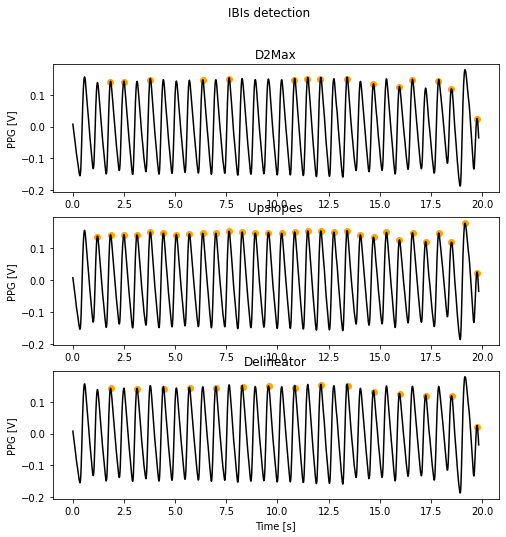

In [72]:
from matplotlib import pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex = False, sharey = False, figsize = (8,8))
fig.suptitle('IBIs detection') 

t = np.arange(0,len(ppg_filt)/fs,1.0/fs)

ax1.plot(t, ppg_filt, color = 'black')
ax1.scatter(t[0] + ppg_ibis_d2max/fs, ppg_filt[ppg_ibis_d2max], color = 'orange', marker = 'o')
ax1.set_ylabel('PPG [V]')
ax1.set_title('D2Max')

ax2.plot(t, ppg_filt, color = 'black')
ax2.scatter(t[0] + ppg_ibis_upslopes/fs, ppg_filt[ppg_ibis_upslopes], color = 'orange', marker = 'o')
ax2.set_ylabel('PPG [V]')
ax2.set_title('Upslopes')

ax3.plot(t, ppg_filt, color = 'black')
ax3.scatter(t[0] + ppg_ibis_delineator/fs, ppg_filt[ppg_ibis_delineator], color = 'orange', marker = 'o')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('PPG [V]')
ax3.set_title('Delineator')

We'll use the 'D2max' algorithm in the rest of this tutorial

<div class="alert alert-block alert-info"> <b>Task:</b> Try repeating this for 'rel_segment_no = 3' How do the beat detectors perform on this patient's data?</div>

### Detect beats in the BP signal

In [73]:
temp_fs = 125
abp_ibis_d2max = pulse_detect(abp_filt,temp_fs,5,'d2max')
print("Detected {} beats in the BP signal using the {} algorithm".format(len(abp_ibis_d2max), "D2max"))

Detected 30 beats in the BP signal using the D2max algorithm


### Plot the results

Text(0, 0.5, 'ABP [au]')

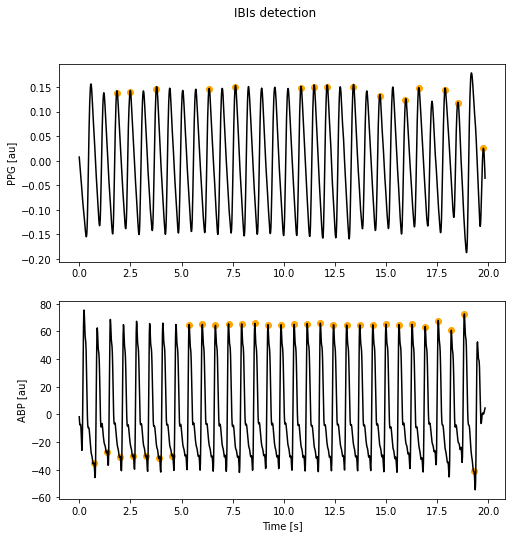

In [74]:
from matplotlib import pyplot as plt
fig, (ax1,ax2) = plt.subplots(2, 1, sharex = False, sharey = False, figsize = (8,8))
fig.suptitle('IBIs detection') 

t = np.arange(0,len(ppg_filt)/fs,1.0/fs)

ax1.plot(t, ppg_filt, color = 'black')
ax1.scatter(t[0] + ppg_ibis_d2max/fs, ppg_filt[ppg_ibis_d2max], color = 'orange', marker = 'o')
ax1.set_ylabel('PPG [au]')

ax2.plot(t, abp_filt, color = 'black')
ax2.scatter(t[0] + abp_ibis_d2max/fs, abp_filt[abp_ibis_d2max], color = 'orange', marker = 'o')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('ABP [au]')

<div class="alert alert-block alert-warning"> <b>Note:</b> In this case, beats are accurately detected in both BP and PPG signals.</div>

---
## Functions

The following functions are required for this tutorial. Run the cell below and then return to the top of the page.

In [75]:
import scipy.signal as sp
import numpy as np

def pulse_detect(x,fs,w,alg):
    """
    Description: Pulse detection and correction from pulsatile signals
    Inputs:  x, array with pulsatile signal [user defined units]
             fs, sampling rate of signal [Hz]
             w, window length for analysis [s]
             alg, string with the name of the algorithm to apply ['heartpy','d2max','upslopes','delineator']
    Outputs: ibis, location of cardiac cycles as detected by the selected algorithm [number of samples]

    Algorithms:       1: HeartPy (van Gent et al, 2019, DOI: 10.1016/j.trf.2019.09.015)
                      2: 2nd derivative maxima (Elgendi et al, 2013, DOI: 10.1371/journal.pone.0076585)
                      3: Systolic upslopes (Arguello Prada and Serna Maldonado, 2018,
                         DOI: 10.1080/03091902.2019.1572237)
                      4: Delineator (Li et al, 2010, DOI: 10.1109/TBME.2005.855725)
    Fiducial points:  1: Systolic peak (pks)
                      2: Onset, as the minimum before the systolic peak (ons)
                      3: Onset, using the tangent intersection method (ti)
                      4: Diastolic peak (dpk)
                      5: Maximum slope (m1d)
                      6: a point from second derivative PPG (a2d)
                      7: b point from second derivative PPG (b2d)
                      8: c point from second derivative PPG (c2d)
                      9: d point from second derivative PPG (d2d)
                      10: e point from second derivative PPG (e2d)
                      11: p1 from the third derivative PPG (p1)
                      12: p2 from the third derivative PPG (p2)

    Libraries: NumPy (as np), SciPy (Signal, as sp), Matplotlib (PyPlot, as plt)

    Version: 1.0 - June 2022

    Developed by: Elisa Mejía-Mejía
                   City, University of London

    """

    # Check selected algorithm
    pos_alg = ['heartpy','d2max','upslopes','delineator']
    if not(alg in pos_alg):
        print('Unknown algorithm determined. Using D2max as default')
        alg = 'd2max'

    # Pre-processing of signal
    x_d = sp.detrend(x)
    sos = sp.butter(10, [0.5, 10], btype = 'bp', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x_d)

    # Peak detection in windows of length w
    n_int = np.floor(len(x_f)/(w*fs))
    for i in range(int(n_int)):
        start = i*fs*w
        stop = (i + 1)*fs*w - 1
        # print('Start: ' + str(start) + ', stop: ' + str(stop) + ', fs: ' + str(fs))
        aux = x_f[range(start,stop)]
        if alg == 'heartpy':
            locs = heartpy(aux,fs,40,180,5)
        elif alg == 'd2max':
            locs = d2max(aux,fs)
        elif alg == 'upslopes':
            locs = upslopes(aux)
        elif alg == 'delineator':
            locs = delineator(aux,fs)
        locs = locs + start
        if i == 0:
            ibis = locs
        else:
            ibis = np.append(ibis,locs)
    if n_int*fs*w != len(x_f):
        start = stop + 1
        stop = len(x_f)
        aux = x_f[range(start,stop)]
        if len(aux) > 20:
            if alg == 'heartpy':
                locs = heartpy(aux,fs,40,180,5)
            elif alg == 'd2max':
                locs = d2max(aux,fs)
            elif alg == 'upslopes':
                locs = upslopes(aux)
            elif alg == 'delineator':
                locs = delineator(aux,fs)
            locs = locs + start
            ibis = np.append(ibis,locs)
    ind, = np.where(ibis <= len(x_f))
    ibis = ibis[ind]

    ibis = peak_correction(x,ibis,fs,20,5,[0.5, 1.5])

    #fig = plt.figure()
    #plt.plot(x)
    #plt.plot(x_d)
    #plt.plot(x_f)
    #plt.scatter(ibis,x_f[ibis],marker = 'o',color = 'red')
    #plt.scatter(ibis,x[ibis],marker = 'o',color = 'red')

    return ibis

def peak_correction(x,locs,fs,t,stride,th_len):
    """
    Correction of peaks detected from pulsatile signals

    Inputs:   x, pulsatile signal [user defined units]
              locs, location of the detected interbeat intervals [number of samples]
              fs, sampling rate [Hz]
              t, duration of intervals for the correction [s]
              stride, stride between consecutive intervals for the correction [s]
              th_len, array with the percentage of lower and higher thresholds for comparing the duration of IBIs
              [proportions]
    Outputs:  ibis, array with the corrected points related to the start of the inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    #fig = plt.figure()
    #plt.plot(x)
    #plt.scatter(locs,x[locs],marker = 'o',color = 'red', label = 'Original')
    #plt.title('Peak correction')

    # Correction of long and short IBIs
    len_window = np.round(t*fs)
    #print('Window length: ' + str(len_window))
    first_i = 0
    second_i = len_window - 1
    while second_i < len(x):
        ind1, = np.where(locs >= first_i)
        ind2, = np.where(locs <= second_i)
        ind = np.intersect1d(ind1, ind2)

        win = locs[ind]
        dif = np.diff(win)
        #print('Indices: ' + str(ind) + ', locs: ' + str(locs[ind]) + ', dif: ' + str(dif))

        th_dif = np.zeros(2)
        th_dif[0] = th_len[0]*np.median(dif)
        th_dif[1] = th_len[1]*np.median(dif)

        th_amp = np.zeros(2)
        th_amp[0] = 0.75*np.median(x[win])
        th_amp[1] = 1.25*np.median(x[win])
        #print('Length thresholds: ' + str(th_dif) + ', amplitude thresholds: ' + str(th_amp))

        j = 0
        while j < len(dif):
            if dif[j] <= th_dif[0]:
                if j == 0:
                    opt = np.append(win[j], win[j + 1])
                else:
                    opt = np.append(win[j], win[j + 1]) - win[j - 1]
                print('Optional: ' + str(opt))
                dif_abs = np.abs(opt - np.median(dif))
                min_val = np.min(dif_abs)
                ind_min, = np.where(dif_abs == min_val)
                print('Minimum: ' + str(min_val) + ', index: ' + str(ind_min))
                if ind_min == 0:
                    print('Original window: ' + str(win), end = '')
                    win = np.delete(win, win[j + 1])
                    print(', modified window: ' + str(win))
                else:
                    print('Original window: ' + str(win), end = '')
                    win = np.delete(win, win[j])
                    print(', modified window: ' + str(win))
                dif = np.diff(win)
            elif dif[j] >= th_dif[1]:
                aux_x = x[win[j]:win[j + 1]]
                locs_pks, _ = sp.find_peaks(aux_x)
                #fig = plt.figure()
                #plt.plot(aux_x)
                #plt.scatter(locs_pks,aux_x[locs_pks],marker = 'o',color = 'red')

                locs_pks = locs_pks + win[j]
                ind1, = np.where(x[locs_pks] >= th_amp[0])
                ind2, = np.where(x[locs_pks] <= th_amp[1])
                ind = np.intersect1d(ind1, ind2)
                locs_pks = locs_pks[ind]
                #print('Locations: ' + str(locs_pks))

                if len(locs_pks) != 0:
                    opt = locs_pks - win[j]

                    dif_abs = np.abs(opt - np.median(dif))
                    min_val = np.min(dif_abs)
                    ind_min, = np.where(dif_abs == min_val)

                    win = np.append(win, locs_pks[ind_min])
                    win = np.sort(win)
                    dif = np.diff(win)
                    j = j + 1
                else:
                    opt = np.round(win[j] + np.median(dif))
                    if opt < win[j + 1]:
                        win = np.append(win, locs_pks[ind_min])
                        win = np.sort(win)
                        dif = np.diff(win)
                        j = j + 1
                    else:
                        j = j + 1
            else:
                j = j + 1

        locs = np.append(win, locs)
        locs = np.sort(locs)

        first_i = first_i + stride*fs - 1
        second_i = second_i + stride*fs - 1

    dif = np.diff(locs)
    dif = np.append(0, dif)
    ind, = np.where(dif != 0)
    locs = locs[ind]

    #plt.scatter(locs,x[locs],marker = 'o',color = 'green', label = 'After length correction')

    # Correction of points that are not peaks
    i = 0
    pre_loc = 0
    while i < len(locs):
        if locs[i] == 0:
            locs = np.delete(locs, locs[i])
        elif locs[i] == len(x):
            locs = np.delete(locs, locs[i])
        else:
            #print('Previous: ' + str(x[locs[i] - 1]) + ', actual: ' + str(x[locs[i]]) + ', next: ' + str(x[locs[i] + 1]))
            cond = (x[locs[i]] >= x[locs[i] - 1]) and (x[locs[i]] >= x[locs[i] + 1])
            #print('Condition: ' + str(cond))
            if cond:
                i = i + 1
            else:
                if locs[i] == pre_loc:
                    i = i + 1
                else:
                    if i == 0:
                        aux = x[0:locs[i + 1] - 1]
                        aux_loc = locs[i] - 1
                        aux_start = 0
                    elif i == len(locs) - 1:
                        aux = x[locs[i - 1]:len(x) - 1]
                        aux_loc = locs[i] - locs[i - 1]
                        aux_start = locs[i - 1]
                    else:
                        aux = x[locs[i - 1]:locs[i + 1]]
                        aux_loc = locs[i] - locs[i - 1]
                        aux_start = locs[i - 1]
                    #print('i ' + str(i) + ' out of ' + str(len(locs)) + ', aux length: ' + str(len(aux)) +
                    #      ', location: ' + str(aux_loc))
                    #print('Locs i - 1: ' + str(locs[i - 1]) + ', locs i: ' + str(locs[i]) + ', locs i + 1: ' + str(locs[i + 1]))

                    pre = find_closest_peak(aux, aux_loc, 'backward')
                    pos = find_closest_peak(aux, aux_loc, 'forward')
                    #print('Previous: ' + str(pre) + ', next: ' + str(pos) + ', actual: ' + str(aux_loc))

                    ibi_pre = np.append(pre - 1, len(aux) - pre)
                    ibi_pos = np.append(pos - 1, len(aux) - pos)
                    ibi_act = np.append(aux_loc - 1, len(aux) - aux_loc)
                    #print('Previous IBIs: ' + str(ibi_pre) + ', next IBIs: ' + str(ibi_pos) +
                    #      ', actual IBIs: ' + str(ibi_act))

                    dif_pre = np.abs(ibi_pre - np.mean(np.diff(locs)))
                    dif_pos = np.abs(ibi_pos - np.mean(np.diff(locs)))
                    dif_act = np.abs(ibi_act - np.mean(np.diff(locs)))
                    #print('Previous DIF: ' + str(dif_pre) + ', next DIF: ' + str(dif_pos) +
                    #      ', actual DIF: ' + str(dif_act))

                    avgs = [np.mean(dif_pre), np.mean(dif_pos), np.mean(dif_act)]
                    min_avg = np.min(avgs)
                    ind, = np.where(min_avg == avgs)
                    #print('Averages: ' + str(avgs) + ', min index: ' + str(ind))
                    if len(ind) != 0:
                        ind = ind[0]

                    if ind == 0:
                        locs[i] = pre + aux_start - 1
                    elif ind == 1:
                        locs[i] = pos + aux_start - 1
                    elif ind == 2:
                        locs[i] = aux_loc + aux_start - 1
                    i = i + 1

    #plt.scatter(locs,x[locs],marker = 'o',color = 'yellow', label = 'After not-peak correction')

    # Correction of peaks according to amplitude
    len_window = np.round(t*fs)
    #print('Window length: ' + str(len_window))
    keep = np.empty(0)
    first_i = 0
    second_i = len_window - 1
    while second_i < len(x):
        ind1, = np.where(locs >= first_i)
        ind2, = np.where(locs <= second_i)
        ind = np.intersect1d(ind1, ind2)
        win = locs[ind]
        if np.median(x[win]) > 0:
            th_amp_low = 0.5*np.median(x[win])
            th_amp_high = 3*np.median(x[win])
        else:
            th_amp_low = -3*np.median(x[win])
            th_amp_high = 1.5*np.median(x[win])
        ind1, = np.where(x[win] >= th_amp_low)
        ind2, = np.where(x[win] <= th_amp_high)
        aux_keep = np.intersect1d(ind1,ind2)
        keep = np.append(keep, aux_keep)

        first_i = second_i + 1
        second_i = second_i + stride*fs - 1

    if len(keep) != 0:
        keep = np.unique(keep)
        locs = locs[keep.astype(int)]

    #plt.scatter(locs,x[locs],marker = 'o',color = 'purple', label = 'After amplitude correction')
    #plt.legend()

    return locs

def find_closest_peak(x, loc, dir_search):
    """
    Finds the closest peak to the initial location in x

    Inputs:   x, signal of interest [user defined units]
              loc, initial location [number of samples]
              dir_search, direction of search ['backward','forward']
    Outputs:  pos, location of the first peak detected in specified direction [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    pos = -1
    if dir_search == 'backward':
        i = loc - 2
        while i > 0:
            if (x[i] > x[i - 1]) and (x[i] > x[i + 1]):
                pos = i
                i = 0
            else:
                i = i - 1
        if pos == -1:
            pos = loc
    elif dir_search == 'forward':
        i = loc + 1
        while i < len(x) - 1:
            if (x[i] > x[i - 1]) and (x[i] > x[i + 1]):
                pos = i
                i = len(x)
            else:
                i = i + 1
        if pos == -1:
            pos = loc

    return pos

def seek_local(x, start, end):
    val_min = x[start]
    val_max = x[start]

    ind_min = start
    ind_max = start

    for j in range(start, end):
        if x[j] > val_max:
            val_max = x[j]
            ind_max = j
        elif x[j] < val_min:
            val_min = x[j]
            ind_min = j

    return val_min, ind_min, val_max, ind_max

def heartpy(x, fs, min_ihr, max_ihr, w):
    """
    Detects inter-beat intervals using HeartPy
    Citation: van Gent P, Farah H, van Nes N, van Arem B (2019) Heartpy: A novel heart rate algorithm
              for the analysis of noisy signals. Transp Res Part F, vol. 66, pp. 368-378. DOI: 10.1016/j.trf.2019.09.015

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
              min_ihr, minimum value of instantaneous heart rate to be accepted [bpm]
              max_ihr, maximum value of instantaneous heart rate to be accepted [bpm]
              w, length of segments for correction of peaks [s]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Identification of peaks
    is_roi = 0
    n_rois = 0
    pos_pks = np.empty(0).astype(int)
    locs = np.empty(0).astype(int)

    len_ma = int(np.round(0.75*fs))
    #print(len_ma)
    sig = np.append(x[0]*np.ones(len_ma), x)
    sig = np.append(sig, x[-1]*np.ones(len_ma))

    i = len_ma
    while i < len(sig) - len_ma:
        ma = np.mean(sig[i - len_ma:i + len_ma - 1])
        #print(len(sig[i - len_ma:i + len_ma - 1]),ma)

        # If it is the beginning of a new ROI:
        if is_roi == 0 and sig[i] >= ma:
            is_roi = 1
            n_rois = n_rois + 1
            #print('New ROI ---' + str(n_rois) + ' @ ' + str(i))
            # If it is a peak:
            if sig[i] >= sig[i - 1] and sig[i] >= sig[i + 1]:
                pos_pks = np.append(pos_pks, int(i))
                #print('Possible peaks: ' + str(pos_pks))

        # If it is part of a ROI which is not over:
        elif is_roi == 1 and sig[i] > ma:
            #print('Actual ROI ---' + str(n_rois) + ' @ ' + str(i))
            # If it is a peak:
            if sig[i] >= sig[i - 1] and sig[i] >= sig[i + 1]:
                pos_pks = np.append(pos_pks, int(i))
                #print('Possible peaks: ' + str(pos_pks))

        # If the ROI is over or the end of the signal has been reached:
        elif is_roi == 1 and (sig[i] < ma or i == (len(sig) - len_ma)):
            #print('End of ROI ---' + str(n_rois) + ' @ ' + str(i) + '. Pos pks: ' + str(pos_pks))
            is_roi = 0 # Lowers flag

            # If it is the end of the first ROI:
            if n_rois == 1:
                # If at least one peak has been found:
                if len(pos_pks) != 0:
                    # Determines the location of the maximum peak:
                    max_pk = np.max(sig[pos_pks])
                    ind, = np.where(max_pk == np.max(sig[pos_pks]))
                    #print('First ROI: (1) Max Peak: ' + str(max_pk) + ', amplitudes: ' + str(sig[pos_pks]) +
                    #      ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                    # The maximum peak is added to the list:
                    locs = np.append(locs, pos_pks[ind])
                    #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1

            # If it is the end of the second ROI:
            elif n_rois == 2:
                # If at least one peak has been found:
                if len(pos_pks) != 0:
                    # Measures instantantaneous HR of found peaks with respect to the previous peak:
                    ihr = 60/((pos_pks - locs[-1])/fs)
                    good_ihr, = np.where(ihr <= max_ihr and ihr >= min_ihr)
                    #print('Second ROI IHR check: (1) IHR: ' + str(ihr) + ', valid peaks: ' + str(good_ihr) +
                    #      ', pos_pks before: ' + str(pos_pks) + ', pos_pks after: ' + str(pos_pks[good_ihr]))
                    pos_pks = pos_pks[good_ihr].astype(int)

                    # If at least one peak is between HR limits:
                    if len(pos_pks) != 0:
                        # Determines the location of the maximum peak:
                        max_pk = np.max(sig[pos_pks])
                        ind, = np.where(max_pk == np.max(sig[pos_pks]))
                        #print('Second ROI: (1) Max Peak: ' + str(max_pk) + ', amplitudes: ' + str(sig[pos_pks]) +
                        #  ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                        # The maximum peak is added to the list:
                        locs = np.append(locs, pos_pks[ind])
                        #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1

            # If it is the end of the any further ROI:
            else:
                # If at least one peak has been found:
                if len(pos_pks) != 0:
                    # Measures instantantaneous HR of found peaks with respect to the previous peak:
                    ihr = 60/((pos_pks - locs[-1])/fs)
                    good_ihr, = np.where(ihr <= max_ihr and ihr >= min_ihr)
                    #print('Third ROI IHR check: (1) IHR: ' + str(ihr) + ', valid peaks: ' + str(good_ihr) +
                    #      ', pos_pks before: ' + str(pos_pks) + ', pos_pks after: ' + str(pos_pks[good_ihr]))
                    pos_pks = pos_pks[good_ihr].astype(int)

                    # If at least one peak is between HR limits:
                    if len(pos_pks) != 0:
                        # Calculates SDNN with the possible peaks on the ROI:
                        sdnn = np.zeros(len(pos_pks))
                        for j in range(len(pos_pks)):
                            sdnn[j] = np.std(np.append(locs/fs, pos_pks[j]/fs))
                        # Determines the new peak as that one with the lowest SDNN:
                        min_pk = np.min(sdnn)
                        ind, = np.where(min_pk == np.min(sdnn))
                        #print('Third ROI: (1) Min SDNN Peak: ' + str(min_pk) + ', amplitudes: ' + str(sig[pos_pks]) +
                        #  ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                        locs = np.append(locs, pos_pks[ind])
                        #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1

            # Resets possible peaks for next ROI:
            pos_pks = np.empty(0)

        i = i + 1;

    locs = locs - len_ma

    # Correction of peaks
    c_locs = np.empty(0)
    n_int = np.floor(len(x)/(w*fs))
    for i in range(int(n_int)):
        ind1, = np.where(locs >= i*w*fs)
        #print('Locs >= ' + str((i)*w*fs) + ': ' + str(locs[ind1]))
        ind2, = np.where(locs < (i + 1)*w*fs)
        #print('Locs < ' + str((i + 1)*w*fs) + ': ' + str(locs[ind2]))
        ind = np.intersect1d(ind1, ind2)
        #print('Larger and lower than locs: ' + str(locs[ind]))
        int_locs = locs[ind]

        if i == 0:
            aux_ibis = np.diff(int_locs)
        else:
            ind, = np.where(locs >= i*w*fs)
            last = locs[ind[0] - 1]
            aux_ibis = np.diff(np.append(last, int_locs))
        avg_ibis = np.mean(aux_ibis)
        th = np.append((avg_ibis - 0.3*avg_ibis), (avg_ibis + 0.3*avg_ibis))
        ind1, = np.where(aux_ibis > th[0])
        #print('Ind1: ' + str(ind1))
        ind2, = np.where(aux_ibis < th[1])
        #print('Ind2: ' + str(ind2))
        ind = np.intersect1d(ind1, ind2)
        #print('Ind: ' + str(ind))

        c_locs = np.append(c_locs, int_locs[ind]).astype(int)
        print(c_locs)

    #fig = plt.figure()
    #plt.plot(x)
    #plt.plot(sig)
    #plt.scatter(locs,x[locs],marker = 'o',color = 'red')
    #if len(c_locs) != 0:
        #plt.scatter(c_locs,x[c_locs],marker = 'o',color = 'blue')

    if len(c_locs) != 0:
        ibis = c_locs
    else:
        ibis = locs

    return ibis

def d2max(x, fs):
    """
    Detects inter-beat intervals using D2Max
    Citation: Elgendi M, Norton I, Brearley M, Abbott D, Schuurmans D (2013) Systolic Peak Detection in Acceleration
              Photoplethysmograms Measured from Emergency Responders in Tropical Conditions. PLoS ONE, vol. 8, no. 10,
              pp. e76585. DOI: 10.1371/journal.pone.0076585

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Bandpass filter
    if len(x) < 4098:
        z_fill = np.zeros(4098 - len(x) + 1)
        x_z = np.append(x, z_fill)
    sos = sp.butter(10, [0.5, 8], btype = 'bp', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x_z)

    # Signal clipping
    ind, = np.where(x_f < 0)
    x_c = x_f
    x_c[ind] = 0

    # Signal squaring
    x_s = x_c**2

    #plt.figure()
    #plt.plot(x)
    #plt.plot(x_z)
    #plt.plot(x_f)
    #plt.plot(x_c)
    #plt.plot(x_s)

    # Blocks of interest
    w1 = (111e-3)*fs
    w1 = int(2*np.floor(w1/2) + 1)
    b = (1/w1)*np.ones(w1)
    ma_pk = sp.filtfilt(b,1,x_s)

    w2 = (667e-3)*fs
    w2 = int(2*np.floor(w2/2) + 1)
    b = (1/w2)*np.ones(w1)
    ma_bpm = sp.filtfilt(b,1,x_s)

    #plt.figure()
    #plt.plot(x_s/np.max(x_s))
    #plt.plot(ma_pk/np.max(ma_pk))
    #plt.plot(ma_bpm/np.max(ma_bpm))

    # Thresholding
    alpha = 0.02*np.mean(ma_pk)
    th_1 = ma_bpm + alpha
    th_2 = w1
    boi = (ma_pk > th_1).astype(int)

    blocks_init, = np.where(np.diff(boi) > 0)
    blocks_init = blocks_init + 1
    blocks_end, = np.where(np.diff(boi) < 0)
    blocks_end = blocks_end + 1
    if blocks_init[0] > blocks_end[0]:
        blocks_init = np.append(1, blocks_init)
    if blocks_init[-1] > blocks_end[-1]:
        blocks_end = np.append(blocks_end, len(x_s))
    #print('Initial locs BOI: ' + str(blocks_init))
    #print('Final locs BOI: ' + str(blocks_end))

    #plt.figure()
    #plt.plot(x_s[range(len(x))]/np.max(x_s))
    #plt.plot(boi[range(len(x))])

    # Search for peaks inside BOIs
    len_blks = np.zeros(len(blocks_init))
    ibis = np.zeros(len(blocks_init))
    for i in range(len(blocks_init)):
        ind, = np.where(blocks_end > blocks_init[i])
        ind = ind[0]
        len_blks[i] = blocks_end[ind] - blocks_init[i]
        if len_blks[i] >= th_2:
            aux = x[blocks_init[i]:blocks_end[ind]]
            if len(aux) != 0:
                max_val = np.max(aux)
                max_ind, = np.where(max_val == aux)
                ibis[i] = max_ind + blocks_init[i] - 1

    ind, = np.where(len_blks < th_2)
    if len(ind) != 0:
        for i in range(len(ind)):
            boi[blocks_init[i]:blocks_end[i]] = 0
    ind, = np.where(ibis == 0)
    ibis = (np.delete(ibis, ind)).astype(int)

    #plt.plot(boi[range(len(x))])

    #plt.figure()
    #plt.plot(x)
    #plt.scatter(ibis, x[ibis], marker = 'o',color = 'red')

    return ibis

def upslopes(x):
    """
    Detects inter-beat intervals using Upslopes
    Citation: Arguello Prada EJ, Serna Maldonado RD (2018) A novel and low-complexity peak detection algorithm for
              heart rate estimation from low-amplitude photoplethysmographic (PPG) signals. J Med Eng Technol, vol. 42,
              no. 8, pp. 569-577. DOI: 10.1080/03091902.2019.1572237

    Inputs:   x, pulsatile signal [user defined units]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Peak detection
    th = 6
    pks = np.empty(0)
    pos_pk = np.empty(0)
    pos_pk_b = 0
    n_pos_pk = 0
    n_up = 0

    for i in range(1, len(x)):
        if x[i] > x[i - 1]:
            n_up = n_up + 1
        else:
            if n_up > th:
                pos_pk = np.append(pos_pk, i)
                pos_pk_b = 1
                n_pos_pk = n_pos_pk + 1
                n_up_pre = n_up
            else:
                pos_pk = pos_pk.astype(int)
                #print('Possible peaks: ' + str(pos_pk) + ', number of peaks: ' + str(n_pos_pk))
                if pos_pk_b == 1:
                    if x[i - 1] > x[pos_pk[n_pos_pk - 1]]:
                        pos_pk[n_pos_pk - 1] = i - 1
                    else:
                        pks = np.append(pks, pos_pk[n_pos_pk - 1])
                    th = 0.6*n_up_pre
                    pos_pk_b = 0
            n_up = 0
    ibis = pks.astype(int)
    #print(ibis)

    #plt.figure()
    #plt.plot(x)
    #plt.scatter(ibis, x[ibis], marker = 'o',color = 'red')

    return ibis

def delineator(x, fs):
    """
    Detects inter-beat intervals using Delineator
    Citation: Li BN, Dong MC, Vai MI (2010) On an automatic delineator for arterial blood pressure waveforms. Biomed
    Signal Process Control, vol. 5, no. 1, pp. 76-81. DOI: 10.1016/j.bspc.2009.06.002

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Lowpass filter
    od = 3
    sos = sp.butter(od, 25, btype = 'low', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x)
    x_m = 1000*x_f

    #plt.figure()
    #plt.plot(x)
    #plt.plot(x_f)
    #plt.plot(x_m)

    # Moving average
    n = 5
    b = (1/n)*np.ones(n)
    x_ma = sp.filtfilt(b,1,x_m)

    # Compute differentials
    dif = np.diff(x_ma)
    dif = 100*np.append(dif[0], dif)
    dif_ma = sp.filtfilt(b,1,dif)

    #plt.figure()
    #plt.plot(x_ma)
    #plt.plot(dif_ma)

    # Average thresholds in original signal
    x_len = len(x)
    if x_len > 12*fs:
        n = 10
    elif x_len > 7*fs:
        n = 5
    elif x_len > 4*fs:
        n = 2
    else:
        n = 1
    #print(n)

    max_min = np.empty(0)
    if n > 1:
        #plt.figure()
        #plt.plot(x_ma)
        n_int = np.floor(x_len/(n + 2))
        #print('Length of intervals: ' + str(n_int))
        for j in range(n):
            # Searches for max and min in 1 s intervals
            amp_min, ind_min, amp_max, ind_max = seek_local(x_ma, int(j*n_int), int(j*n_int + fs))
            #plt.scatter(ind_min, amp_min, marker = 'o', color = 'red')
            #plt.scatter(ind_max, amp_max, marker = 'o', color = 'green')
            max_min = np.append(max_min, (amp_max - amp_min))
        max_min_avg = np.mean(max_min)
        #print('Local max and min: ' + str(max_min) + ', average amplitude: ' + str(max_min_avg))
    else:
        amp_min, ind_min , amp_max, ind_max = seek_local(x_ma, int(close_win), int(x_len))
        #plt.figure()
        #plt.plot(x_ma)
        #plt.scatter(ind_min, amp_min, marker = 'o', color = 'red')
        #plt.scatter(ind_max, amp_max, marker = 'o', color = 'green')
        max_min_avg = amp_max - amp_min
        #print('Local max and min: ' + str(max_min) + ', average amplitude: ' + str(max_min_avg))

    max_min_lt = 0.4*max_min_avg

    # Seek pulse beats by min-max method
    step_win = 2*fs       # Window length to look for peaks/onsets
    close_win = np.floor(0.1*fs)
                          # Value of what is considered too close

    pks = np.empty(0)     # Location of peaks
    ons = np.empty(0)     # Location of onsets
    dic = np.empty(0)     # Location of dicrotic notches

    pk_index = -1          # Number of peaks found
    on_index = -1          # Number of onsets found
    dn_index = -1          # Number of dicrotic notches found

    i = int(close_win)    # Initializes counter
    while i < x_len:      # Iterates through the signal
        #print('i: ' + str(i))
        amp_min = x_ma[i] # Gets the initial value for the minimum amplitude
        amp_max = x_ma[i] # Gets the initial value for the maximum amplitude

        ind = i           # Initializes the temporal location of the index
        aux_pks = i       # Initializes the temporal location of the peak
        aux_ons = i       # Initializes the temporal location of the onset

        # Iterates while ind is lower than the length of the signal
        while ind < x_len - 1:
            #print('Ind: ' + str(ind))
            # Verifies if no peak has been found in 2 seconds
            if (ind - i) > step_win:
                #print('Peak not found in 2 s')
                ind = i   # Refreshes the temporal location of the index
                max_min_avg = 0.6*max_min_avg  # Refreshes the threshold for the amplitude
                # Verifies if the threshold is lower than the lower limit
                if max_min_avg <= max_min_lt:
                    max_min_avg = 2.5*max_min_lt # Refreshes the threshold
                break

            # Verifies if the location is a candidate peak
            if (dif_ma[ind - 1]*dif_ma[ind + 1]) <= 0:
                #print('There is a candidate peak')
                # Determines initial and end points of a window to search for local peaks and onsets
                if (ind + 5) < x_len:
                    i_stop = ind + 5
                else:
                    i_stop = x_len - 1
                if (ind - 5) >= 0:
                    i_start = ind - 5
                else:
                    i_start = 0

                # Checks for artifacts of saturated or signal loss
                if (i_stop - ind) >= 5:
                    for j in range(ind, i_stop):
                        if dif_ma[j] != 0:
                            break
                    if j == i_stop:
                        #print('Artifact')
                        break

                # Candidate onset
                #print('Looking for candidate onsets...')
                #plt.figure()
                #plt.plot(x_ma)
                if dif_ma[i_start] < 0:
                    if dif_ma[i_stop] > 0:
                        aux_min, ind_min, _, _ = seek_local(x_ma, int(i_start), int(i_stop))
                        #plt.scatter(ind_min, aux_min, marker = 'o', color = 'red')
                        if np.abs(ind_min - ind) <= 2:
                            amp_min = aux_min
                            aux_ons = ind_min
                #print('Candidate onset: ' + str([ind_min, amp_min]))
                # Candidate peak
                #print('Looking for candidate peaks...')
                if dif_ma[i_start] > 0:
                    if dif_ma[i_stop] < 0:
                        _, _, aux_max, ind_max = seek_local(x_ma, int(i_start), int(i_stop))
                        #plt.scatter(ind_max, aux_max, marker = 'o', color = 'green')
                        if np.abs(ind_max - ind) <= 2:
                            amp_max = aux_max
                            aux_pks = ind_max
                #print('Candidate peak: ' + str([ind_max, amp_max]))
                # Verifies if the amplitude of the pulse is larger than 0.4 times the mean value:
                #print('Pulse amplitude: ' + str(amp_max - amp_min) + ', thresholds: ' +
                #      str([0.4*max_min_avg, 2*max_min_avg]))
                if (amp_max - amp_min) > 0.4*max_min_avg:
                    #print('Expected amplitude of pulse')
                    # Verifies if the amplitude of the pulse is lower than 2 times the mean value:
                    if (amp_max - amp_min) < 2*max_min_avg:
                        #print('Expected duration of pulse')
                        if aux_pks > aux_ons:
                            #print('Refining onsets...')
                            # Refine onsets:
                            aux_min = x_ma[aux_ons]
                            temp_ons = aux_ons
                            for j in range(aux_pks, aux_ons + 1, -1):
                                if x_ma[j] < aux_min:
                                    aux_min = x_ma[j]
                                    temp_ons = j
                            amp_min = aux_min
                            aux_ons = temp_ons

                            # If there is at least one peak found before:
                            #print('Number of previous peaks: ' + str(pk_index + 1))
                            if pk_index >= 0:
                                #print('There were previous peaks')
                                #print('Duration of ons to peak interval: ' + str(aux_ons - pks[pk_index]) +
                                #     ', threshold: ' + str([3*close_win, step_win]))
                                # If the duration of the pulse is too short:
                                if (aux_ons - pks[pk_index]) < 3*close_win:
                                    #print('Too short interbeat interval')
                                    ind = i
                                    max_min_avg = 2.5*max_min_lt
                                    break
                                # If the time difference between consecutive peaks is longer:
                                if (aux_pks - pks[pk_index]) > step_win:
                                    #print('Too long interbeat interval')
                                    pk_index = pk_index - 1
                                    on_index = on_index - 1
                                    #if dn_index > 0:
                                    #    dn_index = dn_index - 1
                                # If there are still peaks, add the new peak:
                                if pk_index >= 0:
                                    #print('There are still previous peaks')
                                    pk_index = pk_index + 1
                                    on_index = on_index + 1
                                    pks = np.append(pks, aux_pks)
                                    ons = np.append(ons, aux_ons)
                                    #print('Peaks: ' + str(pks))
                                    #print('Onsets: ' + str(ons))

                                    tf = ons[pk_index] - ons[pk_index - 1]

                                    to = np.floor(fs/20)
                                    tff = np.floor(0.1*tf)
                                    if tff < to:
                                        to = tff
                                    to = pks[pk_index - 1] + to

                                    te = np.floor(fs/20)
                                    tff = np.floor(0.5*tf)
                                    if tff < te:
                                        te = tff
                                    te = pks[pk_index - 1] + te

                                    #tff = seek_dicrotic(dif_ma[to:te])
                                    #if tff == 0:
                                    #    tff = te - pks[pk_index - 1]
                                    #    tff = np.floor(tff/3)
                                    #dn_index = dn_index + 1
                                    #dic[dn_index] = to + tff

                                    ind = ind + close_win
                                    break
                            # If it is the first peak:
                            if pk_index < 0:
                                #print('There were no previous peaks')
                                pk_index = pk_index + 1
                                on_index = on_index + 1
                                pks = np.append(pks, aux_pks)
                                ons = np.append(ons, aux_ons)
                                #print('Peaks: ' + str(pks))
                                #print('Onsets: ' + str(ons))
                                ind = ind + close_win
                                break

            ind = ind + 1
        i = int(ind + 1)

    if len(pks) == 0:
        return -1
    else:
        x_len = len(pks)
        temp_p = np.empty(0)
        for i in range(x_len):
            temp_p = np.append(temp_p, pks[i] - od)
        ttk = temp_p[0]
        if ttk < 0:
            temp_p[0] = 0
        pks = temp_p

        x_len = len(ons)
        temp_o = np.empty(0)
        for i in range(x_len):
            temp_o = np.append(temp_o, ons[i] - od)
        ttk = temp_o[0]
        if ttk < 0:
            temp_o[0] = 0
        ons = temp_o

    pks = pks + 5
    ibis = pks.astype(int)

    return ibis


Now return to [this step](#detect-beats-in-the-PPG-signal)